# Policy Briefing Title that Matches PDF Title

## CASA0013: Foundations of Spatial Data Science

### Student Ids: ucfnany, ucfnath, ucfnql0.

### 

### Structure

### Import libraries

### 1. Loading and reading data

### 2. Pre-processing

### 3. Processing

### 4. Analysing, Presenting

### Import Libraries

Before everything, import libraries that will be used to run the following code

In [43]:
import os
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from requests import get
import geopandas as gpd
import seaborn as sns

### 1. Loading data

#### 1.1 Download remote data

We select four years of Inside Airbnb data from 2019 to 2022 for analysing the impacts of Covid-19.

All these data are from gzip compressed files, so extraction is needed.

In [44]:
# set a function for caching data
def cache_data(src: str, dest: str) -> str:
    """
    Downloads and caches a remote file locally.
    
    This will save it locally with the remote files and can check if it already exists, 
    so you don't need to download by yourself and won't do it twice.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
        
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src)  # to combine the components back into a valid URL string
    fn = os.path.split(url.path)[-1]  # Extract the filename
    dfn = os.path.join(dest, fn)  # Destination filename

    if not os.path.isfile(dfn):

        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)

        if len(path) >= 1 and path[0] != "":
            os.makedirs(os.path.join(*path), exist_ok=True)

        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)

        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

The function above allows us to combine components for a vaid URL.

For example, if datasets are all from a same website, so the source path will be the same, the only difference is the follwing downloading parts, see code below.

In [45]:
# set the destination directory for data to download in
ddir = os.path.join("data", "insideairbnb")
# source path
spath = "https://orca.casa.ucl.ac.uk/~jreades/data/"

# download Airbnb data in 2019, 2020, 2021, and 2022, (ab is short as airbnb)
ab19 = pd.read_csv(
    cache_data(spath + "London-2019-11-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)

ab20 = pd.read_csv(
    cache_data(spath + "London-2020-11-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)

ab21 = pd.read_csv(
    cache_data(spath + "London-2021-10-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)
# or use the link to download directly

ab22 = pd.read_csv(
    cache_data(
        "http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/data/listings.csv.gz",
        ddir,
    ),
    compression="gzip",
    low_memory=False,
)

print("Done.")

data/insideairbnb/London-2019-11-listings.csv.gz not found, downloading!
	Done downloading...
data/insideairbnb/London-2020-11-listings.csv.gz not found, downloading!
	Done downloading...
Found data/insideairbnb/London-2021-10-listings.csv.gz locally!
data/insideairbnb/listings.csv.gz not found, downloading!
	Done downloading...
Done.


#### 1.2 Read data

Have a basic overview of data

Here, we set randomly five rows for a quick overview, and check if there are any duplicated rows.

In [46]:
# define a function for basic overview

def overview(df):
    """
    Basic overview of the dataframe.
    
    This can remove the duplicated rows before having an overview. 
    And choosing 5 rows randomly to have a quick view.
    
    Parameters
    ----------
    df: dataframe
    
    """
    print()
    # check if there are duplicate rows and drop them
    if df.duplicated().sum() > 0:
        print(f"There are {df.duplicated().sum()} duplicated rows")
        df.drop_duplicates(inplace=True, ignore_index=True)
        print("These duplicated columns are dropped.")
    else:
        print("There is no duplicated rows.")
    print(f"Data frame is {df.shape[0]:,} rows x {df.shape[1]} columns")
    print("\n")
    
    # check columns and data type
    print("Basic Overview")
    df.info()

    print("\n")
    print("Random rows for a quick view")
    display(df.sample(5))

Overview the data

In [47]:
overview(ab19)


There are 155 duplicated rows
These duplicated columns are dropped.
Data frame is 85,081 rows x 18 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85081 entries, 0 to 85080
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              85081 non-null  object
 1   name                            85081 non-null  object
 2   host_id                         85081 non-null  object
 3   host_name                       85081 non-null  object
 4   neighbourhood_group             85081 non-null  object
 5   neighbourhood                   85081 non-null  object
 6   latitude                        85081 non-null  object
 7   longitude                       85081 non-null  object
 8   room_type                       85081 non-null  object
 9   price                           85081 non-null  object
 10  minimum_nights                  85081 non

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
68846,13341427,Up to 20% off! Primrose Royal,33889201,Veeve,,Camden,51.53943,-.15596,Entire home/apt,350,3,0,,,999,0,Entire home/apt,
70221,17632350,"Private, Cosy Room in London",119912428,Fati,,Newham,51.52224,.00941,Private room,50,2,0,,,1,0,Private room,
4167,31187488,Immaculate and calm single room in North Wembley,35798934,Jo,,Brent,51.56297,-.31599,Private room,20,2,10,2019-11-01,.96,2,88,Private room,11/1/2019 0:00:00
25312,22863245,Superior Canalside DOUBLE ENSUITE near Shoreditch,140240020,Ilmari,,Hackney,51.53719,-.07298,Private room,52,3,11,2019-09-29,.52,3,3,Private room,9/29/2019 0:00:00
25303,22203556,"Newly refurbished, stylish flat in north London",2134435,Kassim,,Haringey,51.58946,-.15394,Entire home/apt,50,30,20,2019-09-29,.9,1,6,Entire home/apt,9/29/2019 0:00:00


In [88]:
overview(ab22)
ab22.head


There is no duplicated rows.
Data frame is 69,330 rows x 75 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69330 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69330 non-null  int64  
 1   listing_url                                   69330 non-null  object 
 2   scrape_id                                     69330 non-null  int64  
 3   last_scraped                                  69330 non-null  object 
 4   source                                        69330 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67812 non-null  object 
 7   neighborhood_overview                         39960 non-null  object 
 8   picture_url                                   6933

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
21090,20913824,https://www.airbnb.com/rooms/20913824,20220910194334,2022-09-12,previous scrape,Private room with bathroom near the Hyde Park,"Great place to stay in Central London, near Ke...","Try a full English breakfast, tasty beer in th...",https://a0.muscache.com/pictures/91736592-cd8d...,68288381,...,4.96,4.94,4.67,NaN,f,2,1,1,0,0.87
24452,23256597,https://www.airbnb.com/rooms/23256597,20220910194334,2022-09-12,previous scrape,Clarkson kingsize room ( a ),Large master size bedroom in a bright and air...,The situated with in all local amenities.<br /...,https://a0.muscache.com/pictures/2f924759-4161...,31870202,...,4.48,4.60,4.32,NaN,t,18,0,18,0,2.91
17771,18485265,https://www.airbnb.com/rooms/18485265,20220910194334,2022-09-11,city scrape,Self isolation loft hoxton square affordable,Perfect location in the heart of shoreditch h...,Hoxton square <br />2 min walk from old street...,https://a0.muscache.com/pictures/82d09b75-1e8a...,16057117,...,4.69,4.93,4.27,NaN,f,1,0,1,0,0.94
49701,51214011,https://www.airbnb.com/rooms/51214011,20220910194334,2022-09-12,previous scrape,Private Room in Beckenham,Heating is not included*<br /><br />A single b...,NaN,https://a0.muscache.com/pictures/5eac645c-e9e7...,282496829,...,4.80,4.73,4.60,NaN,t,4,0,4,0,1.10
53977,54237432,https://www.airbnb.com/rooms/54237432,20220910194334,2022-09-11,city scrape,The Mighty Milborne,"Big, bold and beautiful - and boundless it may...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,5435057,...,5.00,5.00,5.00,NaN,f,2,2,0,0,1.75


<bound method NDFrame.head of                        id                                      listing_url  \
0                   13913               https://www.airbnb.com/rooms/13913   
1                   15400               https://www.airbnb.com/rooms/15400   
2                  284532              https://www.airbnb.com/rooms/284532   
3                  106332              https://www.airbnb.com/rooms/106332   
4                   17402               https://www.airbnb.com/rooms/17402   
...                   ...                                              ...   
69346             9671724             https://www.airbnb.com/rooms/9671724   
69347            20277958            https://www.airbnb.com/rooms/20277958   
69348            20512703            https://www.airbnb.com/rooms/20512703   
69349            49698549            https://www.airbnb.com/rooms/49698549   
69350  554172169432589107  https://www.airbnb.com/rooms/554172169432589107   

            scrape_id last_scrape

Data in 2019 collcted by November: 85,081 rows.

Data in 2020 collected by October: 76,984 rows.

Data in 2021 collected by November: 70,617rows.

Data in 2022 collected by November: 69,351rows.



<div class="alert alert-block alert-warning"><b>Possible problem: wrong datatype</b> 
    
There is a problem with the data type: some numeric data is presented as object. These do not match the ones in [Inside Airbnb Data Doctionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596).
We're going to fix this problem in the pre-processing phase.
</div>

### 2. Pre-processing

#### 2.1 Datatype



In [51]:
# To check the distribution of numeric columns and find if there is any outliers or problemetic value

# Creating histograms for all columns with numeric values to check their distributions and again check their datatype.
def numeric_cols_hist(df, width, height):
    """
    To create histograms of all numeric columns in the dataframe.
    
    This can have a look at distributions of the numeric columns and check it the datatype is correct.
    
    Parameters
    ----------
    df: dataframe
    
    width: set width of histograms
    
    height: set height of histograms
    
    """
    print('Here, density of values in each numeric column is shown.')
    cols = df.select_dtypes(include=('number')).columns.to_list()
    df[cols].hist(bins=30, figsize=(width, height))
    plt.show()


In [52]:
# print columns in airbnb 2019
ab19.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'room_class',
 'last_review_timestamp']

In [53]:
numeric_cols = ['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [54]:
# change columns datatype into the right ones

for col in numeric_cols:
    ab19[col] = ab19[col].str.strip()  # str.strip() can remove leading and trailing characters
    ab19[col] = ab19[col].apply(pd.to_numeric)

ab19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85081 entries, 0 to 85080
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  float64
 1   name                            85081 non-null  object 
 2   host_id                         84912 non-null  float64
 3   host_name                       85081 non-null  object 
 4   neighbourhood_group             85081 non-null  object 
 5   neighbourhood                   85081 non-null  object 
 6   latitude                        84911 non-null  float64
 7   longitude                       84911 non-null  float64
 8   room_type                       85081 non-null  object 
 9   price                           84911 non-null  float64
 10  minimum_nights                  84911 non-null  float64
 11  number_of_reviews               84911 non-null  float64
 12  last_review                     

In [55]:
# select integer columns
int_cols = ['id', 'host_id', 'price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 
           'availability_365']

#for col in int_cols:
#    ab19[col] = ab19[col].astype(int)
# as error shows IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer
# we need to clean the NA values first, some values could be 0 after changing the datatype
ab19 = ab19.dropna()

for col in int_cols:
    ab19[col] = ab19[col].astype(int)

Still need fix some datatype, for example, `id` should be integer instead of float.

Here, density of values in each numeric column is shown.


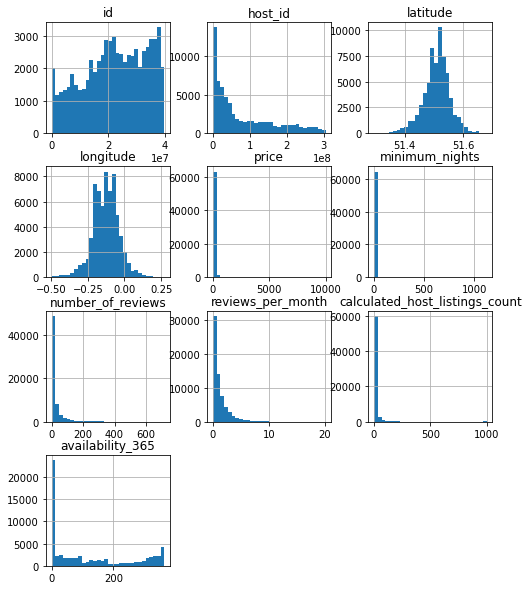

In [56]:
# check the value distributions
numeric_cols_hist(ab19, width=8, height=10)

Seems fine. 

There could be some outliers in column `price`, `minimum_nights`, `number_of_reviews` and the following columns. We will fix this later after choosing the columns we need.

Now the rest three dataframes have wrong datatype showed in `price` column. It should be int.

<div class="alert alert-block alert-warning"><b>Possible problem: ValueError</b> 
    
There is a problem when we wanted to change the datatype of price column, python showed the ValueError: "invalid literal for int() with base 10: '$97.00' " or "Unable to parse string "1,000.00" at position 0".
    
We need two stesp to remove these characters, one for the "$" thing and one for comma. If similar things happen in other column , we can just change the characters and punctuation marks in the function below.
</div>

In [57]:
#ab20['price'] = ab20['price'].astype(int)
#ValueError: invalid literal for int() with base 10: '$97.00'
# and also this error occurs 'Unable to parse string "1,000.00" at position 0'
#so we need to remove the character '$' and the comma ','

def col_to_int(df, col):
    """
    Transform the datatype of price to `int`.
    
    This can remove characters that are leading or tailing the numbers.
    And will remove commas in the string.
    
    Parameters
    ----------
    df: dataframe
    col: 'column name'
    
    """
    df[col] = df[col].str.strip('$') # specific to price column
    df[col] = df[col].str.replace(',', '') #remove comma
    df[col] = df[col].apply(pd.to_numeric) # covert to numeric first
    df[col] = df[col].astype(int)
    df.info() # check
    
col_to_int(ab20, 'price')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76984 entries, 0 to 76983
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76984 non-null  int64  
 1   listing_url                                   76984 non-null  object 
 2   scrape_id                                     76984 non-null  int64  
 3   last_scraped                                  76984 non-null  object 
 4   name                                          76961 non-null  object 
 5   description                                   73931 non-null  object 
 6   neighborhood_overview                         47836 non-null  object 
 7   picture_url                                   76984 non-null  object 
 8   host_id                                       76984 non-null  int64  
 9   host_url                                      76984 non-null 

Here, density of values in each numeric column is shown.


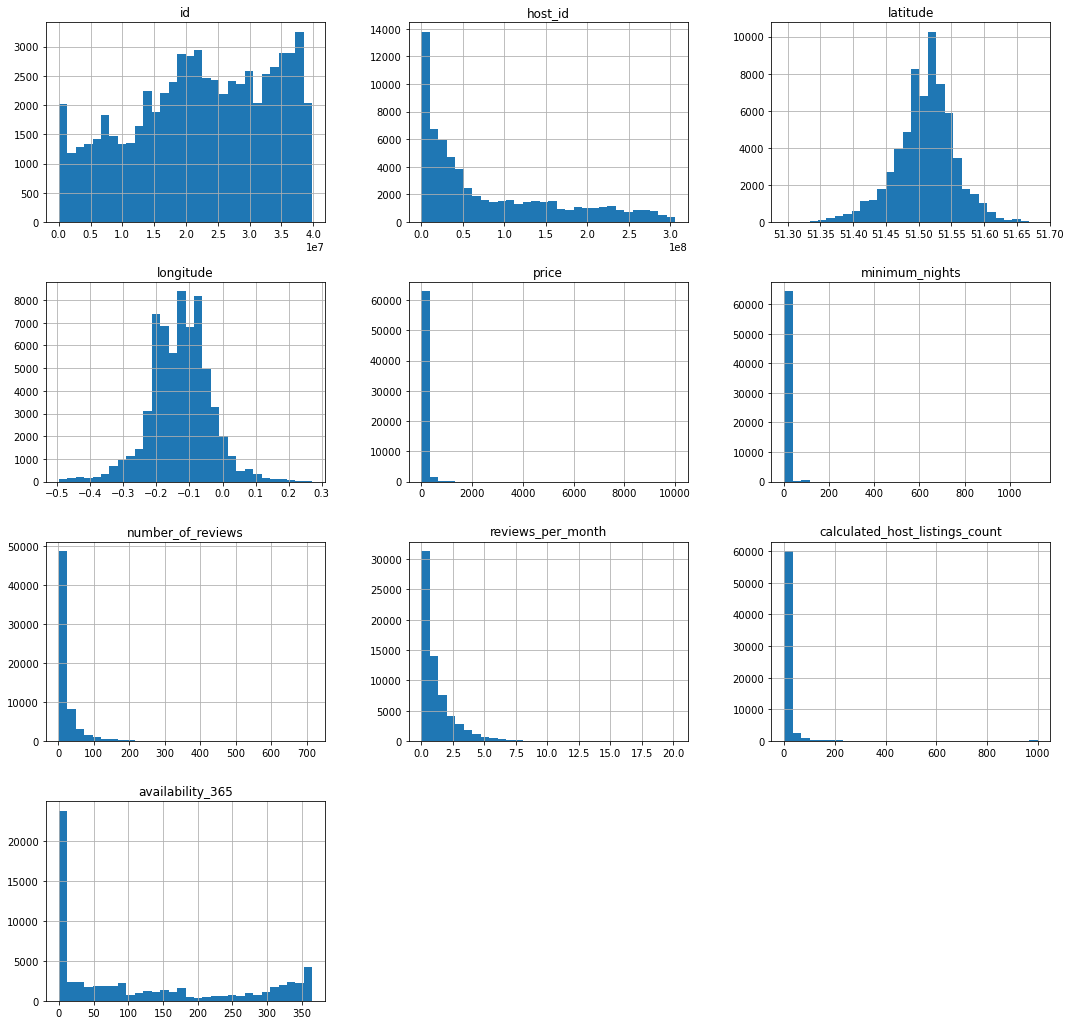

In [89]:
# check the distributions
numeric_cols_hist(ab19, width=18, height=18)

Here, density of values in each numeric column is shown.


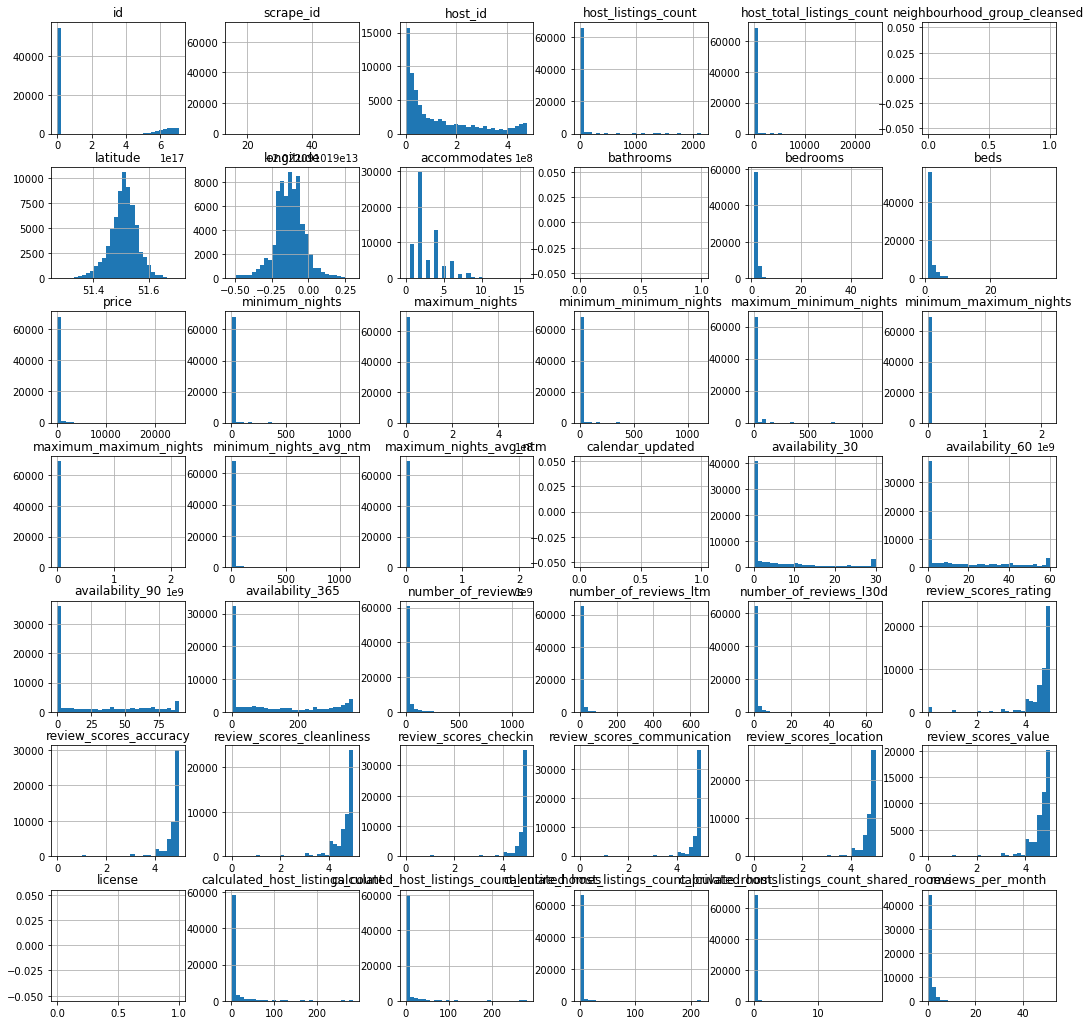

In [62]:
numeric_cols_hist(ab22, width=18, height=18)

#### 2.2 Choosing columns based on our topic

Before continuing our data processing, we're going to select the columns we want first.

We noticed that in `reviews_per_month` from 2019 to 2022 have some empty data values, so we checked the dictionary of this column which refers to "The number of reviews the listing has over the lifetime of the listing". 

Therefore, we can use this as an indicator to define which listings are inactive since they do not have the reviews in the whole year.

In [63]:
ab19.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
room_class                        0
last_review_timestamp             0
dtype: int64

In [66]:
ab22.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               16780
Length: 75, dtype: int64

##### 2.2.1 Drop na values within the column `name`

In [67]:
ab20 = ab20.dropna(subset=['name'])
ab20.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               21716
Length: 74, dtype: int64

In [ ]:
ab22 = ab22.dropna(subset=['name'])
ab22.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               16766
Length: 75, dtype: int64

##### 2.2.2 Choosing columns

We're going to analyse changes between pre-covid and post-covid. So we select year of 2019 and 2022 to choose columns.

In [70]:
cols_19 = ['id',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'availability_365']

In [90]:
cols_22 = ['id',
 'host_id',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'number_of_reviews_ltm', 
 'last_review',
 'reviews_per_month',
 'availability_365']

In [91]:
# new dataframe of 2019
ab19_new = ab19.loc[:,cols_19]
overview(ab19_new)


There is no duplicated rows.
Data frame is 64,938 rows x 11 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64938 entries, 0 to 64937
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 64938 non-null  int64  
 1   host_id            64938 non-null  int64  
 2   neighbourhood      64938 non-null  object 
 3   latitude           64938 non-null  float64
 4   longitude          64938 non-null  float64
 5   price              64938 non-null  int64  
 6   minimum_nights     64938 non-null  int64  
 7   number_of_reviews  64938 non-null  int64  
 8   last_review        64938 non-null  object 
 9   reviews_per_month  64938 non-null  float64
 10  availability_365   64938 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 5.9+ MB


Random rows for a quick view


,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
8026,11688020,60039520,Westminster,51.51496,-0.18062,75,1,206,2019-10-27,4.67,343
22194,31660668,47006048,Kensington and Chelsea,51.51633,-0.21113,197,3,6,2019-10-07,0.95,335
6772,39480502,49778230,Southwark,51.46382,-0.06753,70,3,1,2019-10-29,1.00,10
40632,29427848,67460308,Merton,51.42640,-0.20172,171,5,2,2019-07-06,0.47,30
31055,17727505,74585479,Southwark,51.49126,-0.08243,25,6,59,2019-09-06,1.84,0


In [92]:
# new dataframe of 2022
ab22_new = ab22.loc[:,cols_22]
overview(ab22_new)


There is no duplicated rows.
Data frame is 69,330 rows x 12 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69330 entries, 0 to 69350
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      69330 non-null  int64  
 1   host_id                 69330 non-null  int64  
 2   neighbourhood_cleansed  69330 non-null  object 
 3   latitude                69330 non-null  float64
 4   longitude               69330 non-null  float64
 5   price                   69330 non-null  int64  
 6   minimum_nights          69330 non-null  int64  
 7   number_of_reviews       69330 non-null  int64  
 8   number_of_reviews_ltm   69330 non-null  int64  
 9   last_review             52564 non-null  object 
 10  reviews_per_month       52564 non-null  float64
 11  availability_365        69330 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 6.9+ MB



,id,host_id,neighbourhood_cleansed,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,availability_365
23867,22760905,40345950,Camden,51.52772,-0.12236,145,2,13,0,2019-12-28,0.31,0
33449,32832698,27391699,Westminster,51.51761,-0.14656,318,2,19,10,2022-07-11,0.46,325
24273,23155038,53559215,Hammersmith and Fulham,51.50275,-0.23966,170,4,7,0,2019-10-26,0.13,0
10516,11965083,9329045,Hackney,51.55700,-0.08739,115,7,17,0,2020-09-19,0.24,1
4534,5820545,27125230,Westminster,51.52465,-0.19931,175,3,10,0,2018-08-26,0.12,0


### 3 Processing

In this phase, we'll select columns we need and generate dataframes to be analysed.

#### 3.1 Demand Listings/Group data by borough

We will use `number_of_reviews_ltm` (The number of reviews the listing has in the last 12 months) as the indicator which listings are in demand in the short-rental market during that year.

Data of 2019 does not have the column `number_of_reviews_ltm` . And after we checked the date distribution of the last reviews in 2019, we found that the data included reviews left before 2019. So we're going to select reviews activate only in 2019 as the demand listings in 2019.

In [93]:
# change the object datatype into date

In [94]:
date_cols = ['last_review']

array([[<AxesSubplot:title={'center':'last_review'}>]], dtype=object)

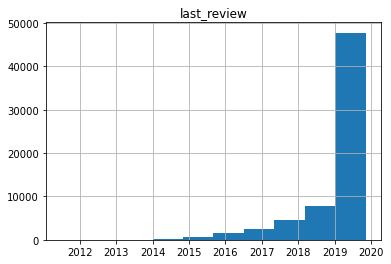

In [95]:
for col in date_cols:
    ab19_new[col] = pd.to_datetime(ab19_new[col])

ab19_new.hist(column = date_cols)

Through the distribution of date, there are some outliers that the dates do not belong with 2019. These listings are not active in 2019, some even not activated since 2014.

As said in the above, we will extract the active ones in 2019.

In [96]:
# 2019 listings was collected on November 2019
# drop last reviews left before 2018-11-01
demand19 = ab19_new[ab19_new['last_review'].ge('2018-11-01')]
demand19.sample(5)

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
2879,8367891,44103276,Kensington and Chelsea,51.49640,-0.18064,435,5,52,2019-11-02,1.07,279
16965,38930272,198480319,Tower Hamlets,51.52250,-0.05031,80,1,3,2019-10-17,2.31,349
4750,15895613,97221539,Hammersmith and Fulham,51.49569,-0.23426,150,4,43,2019-10-31,1.19,334
42929,33418574,48165024,Barnet,51.59619,-0.24999,80,14,4,2019-06-09,0.58,180
24769,21734481,112509686,Camden,51.53931,-0.14366,149,1,37,2019-09-30,1.61,132


In [97]:
demand19_grouped = demand19.groupby("neighbourhood")
list(demand19_grouped)

[('Barking and Dagenham',
               id    host_id         neighbourhood  latitude  longitude  price  \
  7      36150222  271866052  Barking and Dagenham  51.53836    0.09205     50   
  254    37502491  229388229  Barking and Dagenham  51.51856    0.10617     67   
  600    23272062   41028365  Barking and Dagenham  51.54700    0.15558     16   
  651    26709791  192751709  Barking and Dagenham  51.57168    0.13602    170   
  809    33959007   92931228  Barking and Dagenham  51.53708    0.10904    149   
  ...         ...        ...                   ...       ...        ...    ...   
  49502  29588041  222720202  Barking and Dagenham  51.54616    0.16036     30   
  49547  28890934  217790188  Barking and Dagenham  51.53850    0.10599     20   
  49778  28608405  215913703  Barking and Dagenham  51.53762    0.07955     55   
  49895  29518641  218824967  Barking and Dagenham  51.53691    0.08176     66   
  49924  25410963  189726472  Barking and Dagenham  51.54321    0.08743 

In [98]:
# 2022 datatype
for col in date_cols:
    ab22_new[col] = pd.to_datetime(ab22_new[col])

In [99]:
# drop listings do not have reviews in 2022
demand22 = ab22_new[~(ab22_new['number_of_reviews_ltm'] <= 0)]
demand22.head()

,id,host_id,neighbourhood_cleansed,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,availability_365
0,13913,54730,Islington,51.56861,-0.11270,50,1,30,9,2022-07-15,0.20,343
2,284532,1481412,Tower Hamlets,51.52851,-0.07426,90,5,42,1,2022-01-04,0.34,222
4,17402,67564,Westminster,51.52195,-0.14094,379,4,51,8,2022-09-06,0.36,249
5,107048,259088,Islington,51.52478,-0.10484,180,4,493,20,2022-09-02,3.59,236
6,107051,554519,Westminster,51.52055,-0.18317,204,2,581,66,2022-09-02,4.26,193


In [101]:
demand22_grouped = demand22.groupby("neighbourhood_cleansed")
list(demand22_grouped)

[('Barking and Dagenham',
                         id    host_id neighbourhood_cleansed  latitude  \
  113                198258     967537   Barking and Dagenham  51.53430   
  1898              2398015   11242534   Barking and Dagenham  51.52610   
  2858              3588725   18080281   Barking and Dagenham  51.54485   
  4408              5753626   13476281   Barking and Dagenham  51.53381   
  4673              6178838   11405480   Barking and Dagenham  51.53392   
  ...                   ...        ...                    ...       ...   
  69194  633157410475691019   33421573   Barking and Dagenham  51.53550   
  69204            54085211  438363720   Barking and Dagenham  51.52940   
  69206            14714730   91564832   Barking and Dagenham  51.53074   
  69281            53181820  392206543   Barking and Dagenham  51.53475   
  69282  576203530706730254  444186504   Barking and Dagenham  51.53148   
  
         longitude  price  minimum_nights  number_of_reviews  \
  113  

#### 3.2 Supply listings/Group data by borough

As the data is collected from AirBnb. After removing the NA values, the listings are the supply listings.

In [102]:
supply_19 = ab19_new
supply_22 = ab22_new

In [103]:
supply_19_grouped = supply_19.groupby("neighbourhood")
list(supply_19_grouped)

[('Barking and Dagenham',
               id    host_id         neighbourhood  latitude  longitude  price  \
  7      36150222  271866052  Barking and Dagenham  51.53836    0.09205     50   
  254    37502491  229388229  Barking and Dagenham  51.51856    0.10617     67   
  600    23272062   41028365  Barking and Dagenham  51.54700    0.15558     16   
  651    26709791  192751709  Barking and Dagenham  51.57168    0.13602    170   
  809    33959007   92931228  Barking and Dagenham  51.53708    0.10904    149   
  ...         ...        ...                   ...       ...        ...    ...   
  64462   7431271   38925762  Barking and Dagenham  51.52602    0.11656     30   
  64479   7295794   38213851  Barking and Dagenham  51.53889    0.09691     50   
  64777   4537709   23528890  Barking and Dagenham  51.53706    0.07850     53   
  64858    333931    1693107  Barking and Dagenham  51.57291    0.14562     45   
  64933    306405    1575800  Barking and Dagenham  51.54259    0.15386 

In [105]:
supply_22_grouped = supply_22.groupby("neighbourhood_cleansed")
list(supply_22_grouped)

[('Barking and Dagenham',
                         id    host_id neighbourhood_cleansed  latitude  \
  65                 306405    1575800   Barking and Dagenham  51.54072   
  113                198258     967537   Barking and Dagenham  51.53430   
  1898              2398015   11242534   Barking and Dagenham  51.52610   
  2453              3322644   16775451   Barking and Dagenham  51.55499   
  2858              3588725   18080281   Barking and Dagenham  51.54485   
  ...                   ...        ...                    ...       ...   
  69206            14714730   91564832   Barking and Dagenham  51.53074   
  69268            39526734  303591154   Barking and Dagenham  51.51735   
  69279            39526933  303591154   Barking and Dagenham  51.51775   
  69281            53181820  392206543   Barking and Dagenham  51.53475   
  69282  576203530706730254  444186504   Barking and Dagenham  51.53148   
  
         longitude  price  minimum_nights  number_of_reviews  \
  65   

#### 3.3 Supply changes in 2019, and 2022

##### Determine the number of listings in each region by looking at how many times each borough appears in the data.

In [147]:
import pandas as pd
number_of_listings_19 = supply_19.value_counts(supply_19['neighbourhood'])
number_of_listings_19

neighbourhood
Westminster               7368
Tower Hamlets             6441
Hackney                   4842
Camden                    4795
Kensington and Chelsea    4390
Islington                 3983
Southwark                 3911
Lambeth                   3895
Hammersmith and Fulham    3276
Wandsworth                3237
Brent                     1955
Lewisham                  1762
Haringey                  1642
Newham                    1460
Ealing                    1321
Greenwich                 1232
Barnet                    1132
Waltham Forest            1074
Merton                     973
Richmond upon Thames       904
Croydon                    800
Hounslow                   744
Redbridge                  499
Bromley                    495
Hillingdon                 470
Enfield                    464
Kingston upon Thames       412
Harrow                     340
City of London             324
Barking and Dagenham       249
Sutton                     216
Havering                 

In [160]:
import pandas as pd
number_of_listings_22= supply_22.value_counts(supply_22['neighbourhood_cleansed'])
#number_of_listings_22.columns = ['neighbourhood_cleansed','neighbourhood']
number_of_listings_22

neighbourhood_cleansed
Westminster               7760
Tower Hamlets             5591
Hackney                   5166
Camden                    4706
Kensington and Chelsea    4612
Southwark                 3966
Islington                 3788
Lambeth                   3717
Wandsworth                3473
Hammersmith and Fulham    2995
Brent                     2068
Lewisham                  2016
Haringey                  1897
Newham                    1681
Barnet                    1611
Ealing                    1553
Greenwich                 1514
Waltham Forest            1322
Merton                    1113
Richmond upon Thames      1108
Hounslow                  1078
Croydon                   1066
Hillingdon                 714
Redbridge                  669
Enfield                    617
Kingston upon Thames       609
Bromley                    593
Harrow                     444
Barking and Dagenham       433
City of London             424
Bexley                     411
Havering        

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


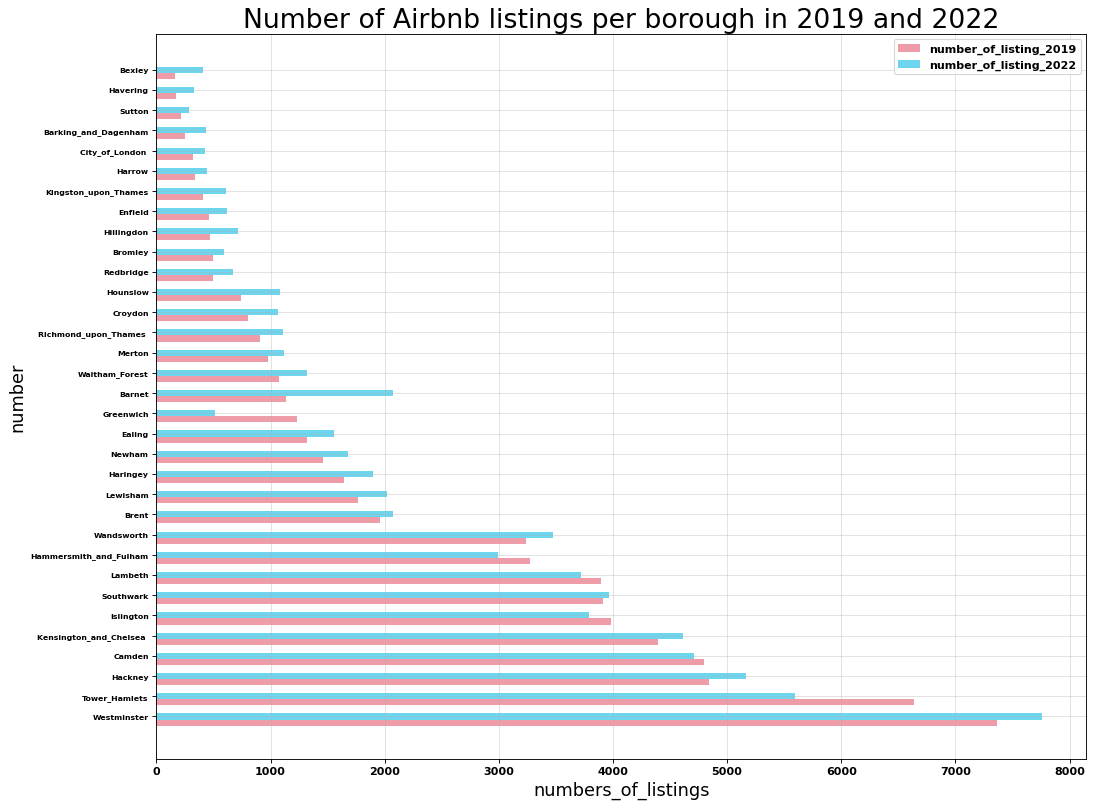

In [172]:
from matplotlib import pyplot as plt
from matplotlib import font_manager



#设置图形大小
plt.figure(figsize=(15,12),dpi = 80)

#数据
a = ["Westminster","Tower_Hamlets","Hackney","Camden","Kensington_and_Chelsea ","Islington","Southwark"
    ,"Lambeth","Hammersmith_and_Fulham","Wandsworth","Brent","Lewisham","Haringey","Newham","Ealing"
    ,"Greenwich","Barnet","Waltham_Forest","Merton","Richmond_upon_Thames ","Croydon","Hounslow","Redbridge"
    ,"Bromley","Hillingdon","Enfield","Kingston_upon_Thames","Harrow","City_of_London ","Barking_and_Dagenham","Sutton",
     "Havering","Bexley"]
b_1 = [7368,6641,4842,4795,4390,3983,3911,3895,3276,3237,1955,1762,1642,1460,1321,1232,1132,1074,973,904,800,744,499,495,470,464,412,340,324,249,216,173,159]
b_2 = [7760,5591,5166,4706,4612,3788,3966,3717,2995,3473,2068,2016,1897,1681,1553,514,2068,1322,1113,1108,1066,1078,669,593,714,617,609,444,424,433,286,329,411]

height = 0.3
a1 = list(range(len(a)))
a2 = [i+height for i in a1]#坐标轴偏移
#a3 = [i+height*2 for i in a1]

#绘图
plt.barh(range(len(a)),b_1,height= height,label = "number_of_listing_2019",color = "#ee9ca7")
plt.barh(a2,b_2,height= height,label = "number_of_listing_2022",color = "#6dd5ed")


#绘制网格
plt.grid(alpha = 0.4)

#y轴坐标刻度标识
plt.yticks(a2,a,fontsize = 7)

#添加图例
plt.legend()

#添加横纵坐标，标题
plt.xlabel("numbers_of_listings",fontsize = 16)
plt.ylabel("number",fontsize = 16)
plt.title("Number of Airbnb listings per borough in 2019 and 2022",fontsize = 24)

#显示图形
plt.show()



## 4. Analysing, Presenting

### 4.1 loading the shapefile